# Phyloseq tutorial - paper can be found [here](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0061217) 

## Allows you to import, store, analyze and graphically display complex phylogenetic sequencing data - this can include 16S and metagenomics and formats can be in Biom, txt, tsv, or csv. This package leverages many of the tools available in R for ecology and phylogenetic analysis (vegan, ade4, ape, picante), while also using advanced/flexible graphic systems (ggplot2) to easily produce publication-quality graphics of complex phylogenetic data. 

In [27]:
## try http:// if https:// URLs are not supported
source("https://bioconductor.org/biocLite.R")
biocLite("phyloseq")

Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.4.1 (2017-06-30).
Installing package(s) ‘phyloseq’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'ape', 'checkmate', 'geosphere', 'glue', 'lazyeval', 'lubridate',
  'openssl', 'phangorn', 'pryr', 'quantreg', 'ritis', 'rlang', 'robustbase',
  'solrium', 'tidyselect', 'tidyverse', 'withr', 'XML'


In [28]:
library(phyloseq)
library(ggplot2)
library(dplyr)
#Make sure the data has the sample names on rows if not just transform the data with t()
abund_table<-read.csv("Changed_name_OTU_table_DNA_BBclub.csv",row.names=1,check.names=FALSE)
meta_table<-read.csv("Mapping_file_virus.csv",row.names=1,check.names=FALSE)
#Transpose the data to have sample names on rows
abund_table<-t(abund_table)


In [30]:
meta_table

,Taxa,Sampling.Dates,Season,Type_of_Nucleic_Acid,Type_of_Nucleic_Acid_NACLOSED,DNA_noCLosed,RNA_noCLosed,Description
AP-DNA-1-Jan-Winter,AP-DNA-1_S1_blast.txt,20 January 2014-17 February 2014,Winter,DNA,DNA,DNA,NA,AP-DNA-1-Jan-Winter
AP-DNA-10-Sep-Fall,AP-DNA-10_S2_blast.txt,29 September 2014-27 October 2014,Fall,DNA,DNA,DNA,NA,AP-DNA-10-Sep-Fall
AP-DNA-11-Oct-Fall,AP-DNA-11_S3_blast.txt,27 October 2014-24 November 2014,Fall,DNA,DNA,DNA,NA,AP-DNA-11-Oct-Fall
AP-DNA-12-Nov-Winter,AP-DNA-12_S4_blast.txt,24 November 2014-23 December 2014,Winter,DNA,DNA,DNA,NA,AP-DNA-12-Nov-Winter
AP-DNA-13-Jan-Winter,AP-DNA-13_S5_blast.txt,05 Janurary 2015-02 February 2015,Winter,DNA,DNA,DNA,NA,AP-DNA-13-Jan-Winter
AP-DNA-14-Dec-Closed,AP-DNA-14_S6_blast.txt,23 December 2014-05 January 2015,Closed,DNA,DNA,NA,NA,AP-DNA-14-Dec-Closed
AP-DNA-15-NA-NA,AP-DNA-15_S7_blast.txt,Unexposed Filter,NA,DNA,DNA,NA,NA,AP-DNA-15-NA-NA
AP-DNA-16-NA-NA,AP-DNA-16_S8_blast.txt,Negative Control,NA,DNA,DNA,NA,NA,AP-DNA-16-NA-NA
AP-DNA-2-Feb-Winter,AP-DNA-2_S9_blast.txt,17 February 2014-17 March 2014,Winter,DNA,DNA,DNA,NA,AP-DNA-2-Feb-Winter
AP-DNA-3-Mar-Spring,AP-DNA-3_S10_blast.txt,17 March 2014- 14 April 2014,Spring,DNA,DNA,DNA,NA,AP-DNA-3-Mar-Spring


In [29]:
meta_table<-data.frame(meta_table)

In [30]:
#Filter out samples not present in meta_table
abund_table<-abund_table[rownames(abund_table) %in% rownames(meta_table),]

In [31]:
#Now load the taxonomy
OTU_taxonomy<-read.csv("changed_viral_nametaxonomy.csv",row.names=1,check.names=FALSE)

In [32]:
#Convert to phyloseq
library(phyloseq)
#Convert the data to phyloseq format
OTU = otu_table(as.matrix(abund_table), taxa_are_rows = FALSE)
TAX = tax_table(as.matrix(OTU_taxonomy))
SAM = sample_data(meta_table)
physeq<-merge_phyloseq(phyloseq(OTU, TAX),SAM)

In [33]:
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1132 taxa and 14 samples ]
sample_data() Sample Data:       [ 14 samples by 8 sample variables ]
tax_table()   Taxonomy Table:    [ 1132 taxa by 7 taxonomic ranks ]

# Sequencing depth

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    154    2594    2848    3598    4521    8789 

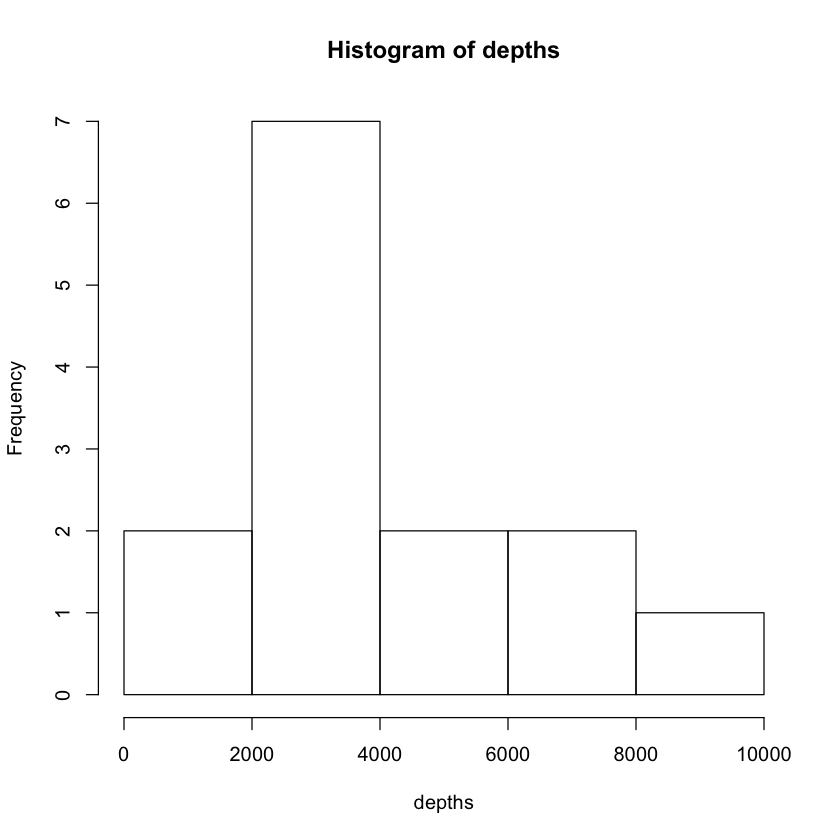

In [35]:
depths <- sample_sums(physeq)
summary(depths)
hist(depths)

# Bargraphs

In [36]:
head(sample_data(physeq),1)
sample_data(physeq)$Season

,Taxa,Sampling.Dates,Season,Type_of_Nucleic_Acid,Type_of_Nucleic_Acid_NACLOSED,DNA_noCLosed,RNA_noCLosed,Description
AP-DNA-1-Jan-Winter,AP-DNA-1_S1_blast.txt,20 January 2014-17 February 2014,Winter,DNA,DNA,DNA,NA,AP-DNA-1-Jan-Winter


[1] Winter Fall   Fall   Winter Closed <NA>   <NA>   Winter Spring Spring
[11] Spring Summer Summer Summer
Levels: Closed Fall  Spring Summer Winter

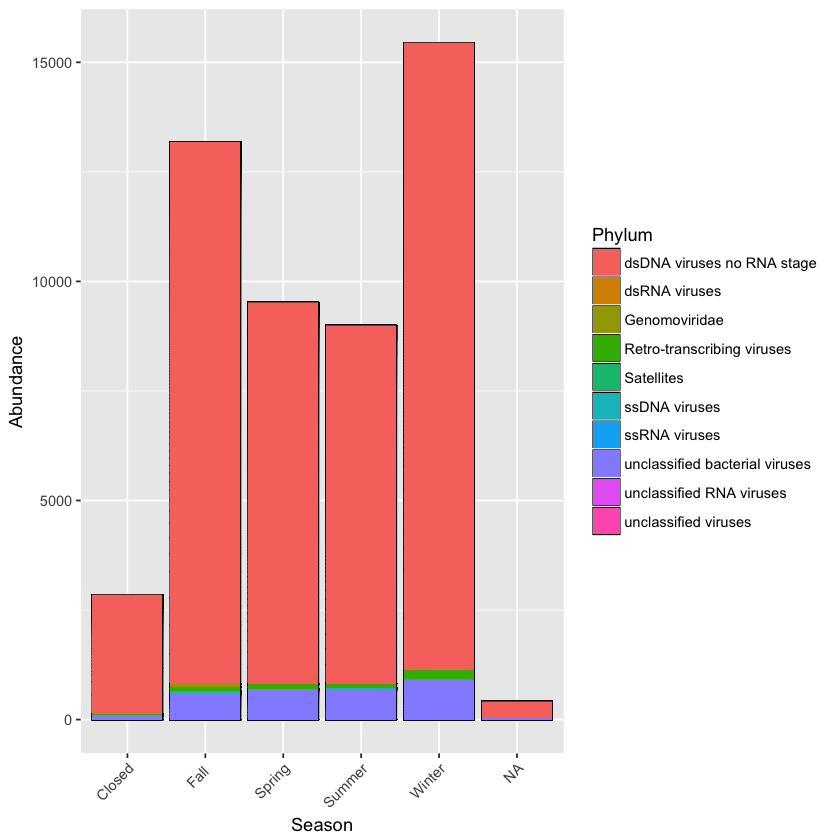

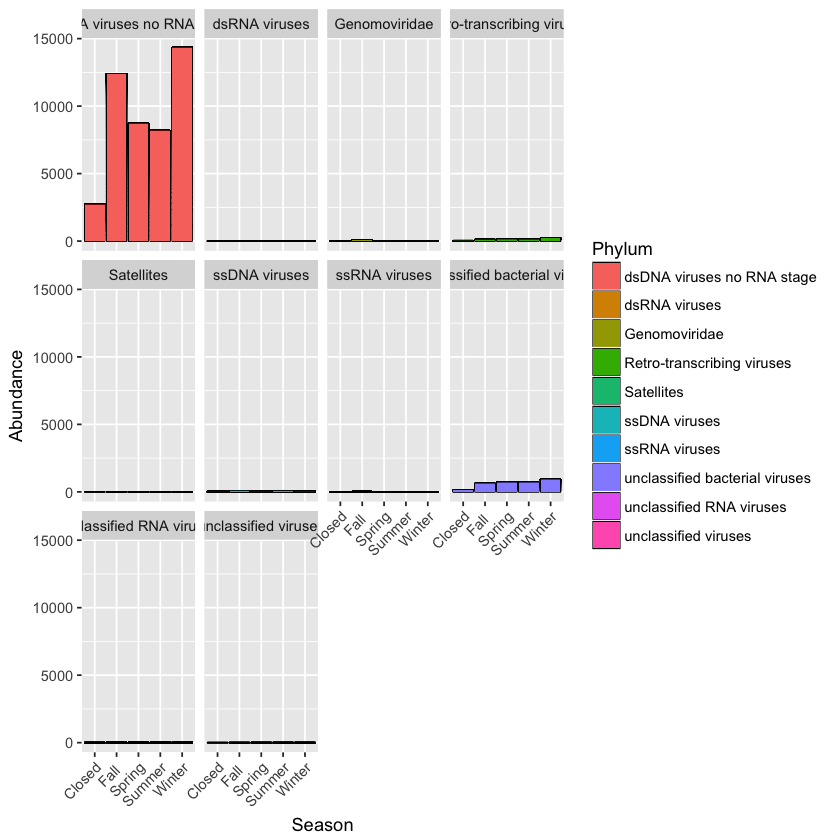

In [37]:
#pdf('PDF_Phyloseq_Seasonal_Viruses/bar_plot_no_NA_RNADNA.pdf')

#dev.off()
p<-plot_bar(physeq, x="Season", fill="Phylum")+theme(axis.text.x = element_text(angle = 45, hjust = 1))
p + geom_bar(stat = "identity", position = "stack")

# subset and 
physeqbarnoA=subset_samples(physeq, Season!='NA')
x<-plot_bar(physeqbarnoA, x="Season", fill="Phylum")+facet_wrap(~Phylum)+theme(axis.text.x = element_text(angle = 45, hjust = 1))
x + geom_bar(stat = "identity", position = "stack")

# Lets remove NA and 'Closed' samples and seperate based on nucleotid type

In [11]:
# remove 'NA' and closed
print ('Original')

summary(sample_data(physeq)$Season ) 
physeq.noNAo=subset_samples(physeq, Season!='NA')# have to remove blanks
physeq.noNA=subset_samples(physeq.noNAo, Season!='Closed')# have to remove blanks

#subset based on nucletide type
physeq.DNA=subset_samples(physeq.noNA, Type_of_Nucleic_Acid !='RNA'  )# have to remove RNA
print('DNA Samples')
summary(sample_data(physeq.DNA)$Season ) 


[1] "Original"


Closed  Fall  Spring Summer Winter   NA's 
     1      2      3      3      3      2

[1] "DNA Samples"


Fall  Spring Summer Winter 
     2      3      3      3

# Let's get percent relative abundance

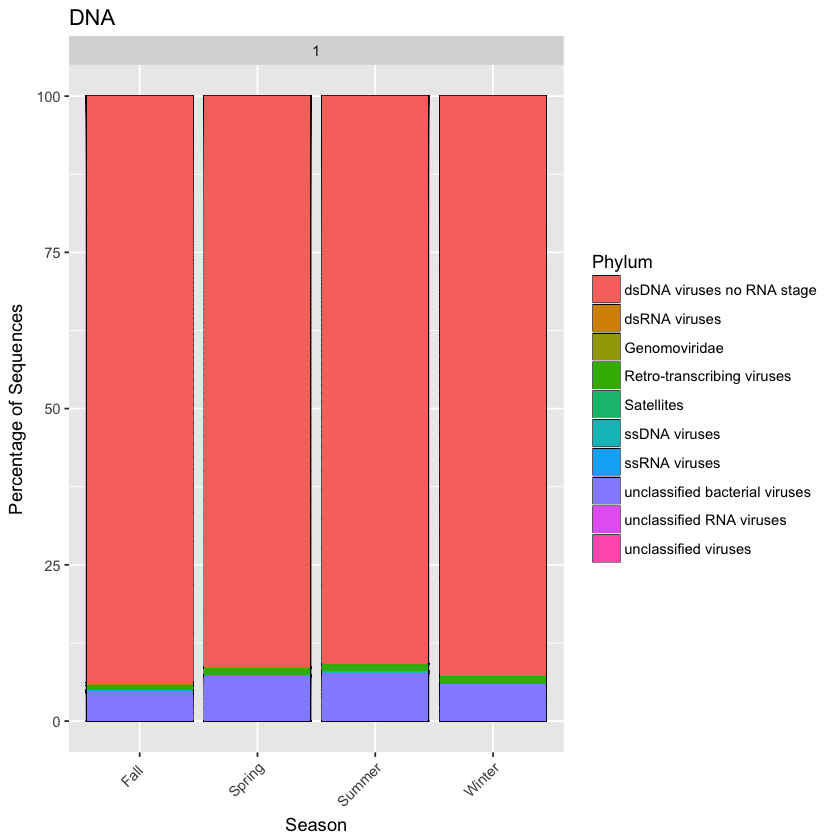

In [12]:
##############
#--------merge samples based on season
#############

#DNA---------
#If you dont merge your percent abudnace will accumulate in a per sample basis
physeq.noNA.rm = merge_samples(physeq.DNA, "Season")

#Repair the merged values associated with each surface after merge. 
sample_data(physeq.noNA.rm)$Season <- levels(sample_data(physeq.noNA)$Season)

#transform to percent total abudnance
physeq.noNA.rm.percent = transform_sample_counts(physeq.noNA.rm, function(x) 100 * x/sum(x))
    
#percent abundance plot
p<-plot_bar(physeq.noNA.rm.percent, x="Season", fill="Phylum",title = "DNA")+facet_wrap(~Type_of_Nucleic_Acid)+theme(axis.text.x = element_text(angle = 45, hjust = 1))
p + geom_bar(stat = "identity", position = "stack")+ylab("Percentage of Sequences")



# Can't tell much from the data above. What if we just look at the top 20 abundant viruses

In [13]:
#first we sort the data
TopNOTUsdna = names(sort(taxa_sums(physeq.noNA.rm.percent), TRUE)[1:20])
#prune those OTUs
top15dna = prune_taxa(TopNOTUsdna, physeq.noNA.rm.percent)
top15dna

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 20 taxa and 4 samples ]
sample_data() Sample Data:       [ 4 samples by 8 sample variables ]
tax_table()   Taxonomy Table:    [ 20 taxa by 7 taxonomic ranks ]

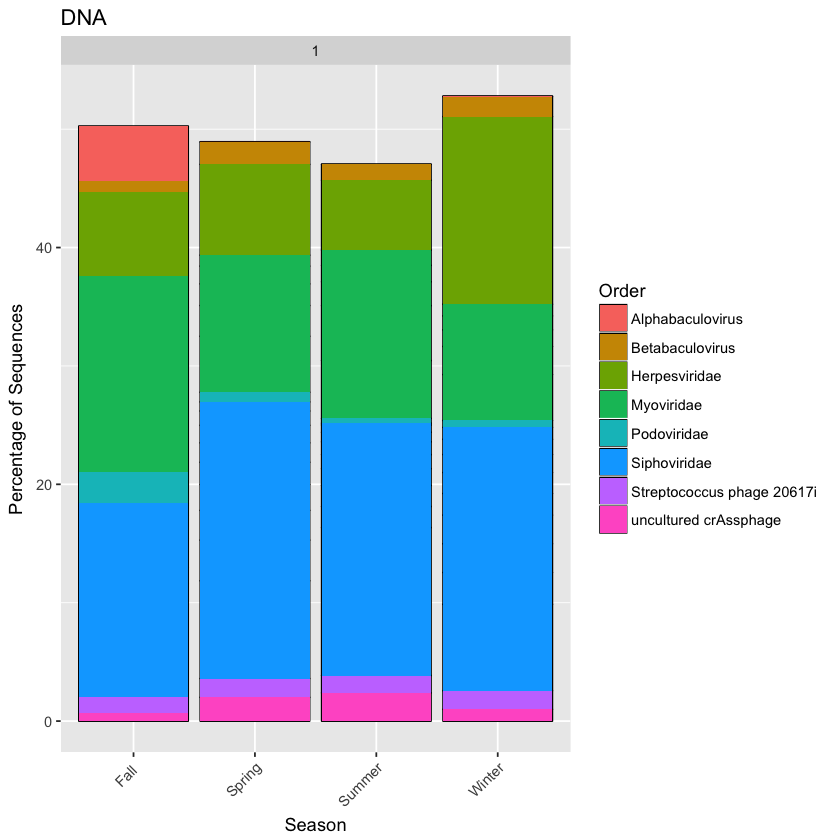

In [14]:
#percent abundance plot
p<-plot_bar(top15dna, x="Season", fill="Order",title = "DNA")+facet_wrap(~Type_of_Nucleic_Acid)+theme(axis.text.x = element_text(angle = 45, hjust = 1))
p + geom_bar(stat = "identity", position = "stack")+ylab("Percentage of Sequences")




# Alpha Diversity. Estimate alpa diversity by subsampling libraries with replacement to estimate the species abundace of the real population

In [15]:
# It is always important to set a seed when you subsample so your result is replicable 
set.seed(3)

for (i in 1:100) {
  # Subsample
    
  viral.rarefy <- rarefy_even_depth(physeq.noNAo, sample.size = 1300, verbose = FALSE, replace = TRUE)
}

In [16]:
#RAREFY DATASET TO DO MDS or pcoa or whatever 
library("vegan")
library("grid")
#'Alpha diversity with ANOVA
#'
#'This function calculates alpha diversity of provided community data using
#'selected indices/method(s). It performs pair-wise ANOVA of diversity measures between groups
#'and outputs a plot for each of the selected methods(indices) annotated with significance levels.
#'
#' @param physeq (Required). A \code{phyloseq} object containing merged information of abundance,
#'        taxonomic assignment, sample data including the measured variables and categorical information
#'        of the samples, and / or phylogenetic tree if available.
#' @param method (Required). A list of character strings specifying \code{method} to be used to calculate for alpha diversity 
#'        in the data. Available methods are: "richness", "fisher", "simpson", "shannon" and "evenness".
#' @param grouping_column (Required). A character string specifying the name of a categorical variable containing  grouping information.
#' @return Returns a ggplot object which can further be manipulated further.
#' 
#' @examples 
#' data(pitlatrine)
#' physeq <- pitlatrine
#' p<-plot_anova_diversity(physeq, method = c("richness","simpson"),grouping_column =  "Country",pValueCutoff=0.05)
#' plot_anova_diversity(physeq, method = c("richness","shannon"), grouping_column = "Depth")
#' print(p)
#' 
#' @references \url{http://userweb.eng.gla.ac.uk/umer.ijaz/}, Umer Ijaz, 2015
#' 
#' @author Alfred Ssekagiri \email{assekagiri@gmail.com},Umer Zeeshan Ijaz \email{Umer.Ijaz@glasgow.ac.uk}
#' 
#' @import ggplot2
#' @import grid
#'
#' @export plot_anova_diversity
#' 

plot_anova_diversity <- function(physeq, method, grouping_column,pValueCutoff=0.05)
{
  abund_table <- otu_table(physeq)
  meta_table <- sample_data(physeq)
  
  #get diversity measure using selected methods
  div.df <- alpha_div(physeq,method)
  
  #=add grouping information to alpha diversity measures
  df<-data.frame(div.df,(meta_table[,grouping_column])[as.character(div.df$sample),])
  
  #perform anova of diversity measure between groups
  anova_res <- perform_anova(df,meta_table,grouping_column,pValueCutoff)
  df_pw <- anova_res$df_pw #get pairwise p-values 
  
  #Draw the boxplots
  p<-ggplot(aes_string(x=grouping_column,y="value",color=grouping_column),data=df)
  p<-p+geom_boxplot()+geom_jitter(position = position_jitter(height = 0, width=0))
  p<-p+theme_bw()
  p<-p+theme(axis.text.x = element_text(angle = 90, hjust = 1))
  p<-p+facet_wrap(~measure,scales="free_y",nrow=1)+ylab("Observed Values")+xlab("Samples")
  p<-p+theme(strip.background = element_rect(fill = "white"))+xlab("Groups")
  #This loop will generate the lines and signficances
  
  for(i in 1:dim(df_pw)[1]){
    p<-p+geom_path(inherit.aes=F,aes(x,y),data = data.frame(x = c(which(levels(df[,grouping_column])==as.character(df_pw[i,"from"])),which(levels(df[,grouping_column])==as.character(df_pw[i,"to"]))), y = c(as.numeric(as.character(df_pw[i,"y"])),as.numeric(as.character(df_pw[i,"y"]))), measure=c(as.character(df_pw[i,"measure"]),as.character(df_pw[i,"measure"]))), color="black",lineend = "butt",arrow = arrow(angle = 90, ends = "both", length = unit(0.1, "inches")))
    p<-p+geom_text(inherit.aes=F,aes(x=x,y=y,label=label),data=data.frame(x=(which(levels(df[,grouping_column])==as.character(df_pw[i,"from"]))+which(levels(df[,grouping_column])==as.character(df_pw[i,"to"])))/2,y=as.numeric(as.character(df_pw[i,"y"])),measure=as.character(df_pw[i,"measure"]),label=as.character(cut(as.numeric(as.character(df_pw[i,"p"])),breaks=c(-Inf, 0.001, 0.01, 0.05, Inf),label=c("***", "**", "*", "")))))
  }
  return(p)
}

#'Alpha diversity measure
#'
#'This function calculates alpha diversity of provided community data using
#'selected indices/method. 
#' @param physeq (Required). A \code{phyloseq} object containing merged information of abundance,
#'        taxonomic assignment, sample data including the measured variables and categorical information
#'        of the samples, and / or phylogenetic tree if available.
#' @param method (Required). A list of character strings specifying \code{method} to be used to calculate for alpha diversity 
#'        in the data. Available methods are: "richness", "fisher", "simpson", "shannon" and "evenness".
#' @return It returns a data frame of diversity measure and corresponding indices/methods
#' @references \url{http://userweb.eng.gla.ac.uk/umer.ijaz/}, Umer Ijaz, 2015
#' 
#' @author Alfred Ssekagiri \email{assekagiri@gmail.com},Umer Zeeshan Ijaz \email{Umer.Ijaz@glasgow.ac.uk}
#' 
#' @import vegan
#' @import phyloseq
#'
#'@export alpha_div
#'
alpha_div <- function(physeq,method){
  #==check for validity of selected methods 
  method<- match.arg(method,c("richness", "fisher", "simpson", "shannon", "evenness","pd"), several.ok = TRUE)
  
  abund_table <- otu_table(physeq)
  df <- NULL
  if("richness"%in%method){
    R<-rarefy(abund_table,min(rowSums(abund_table)))
    df_R<-data.frame(sample=names(R),value=R,measure=rep("Richness",length(R)))
    if(is.null(df)){
      df<-df_R} 
    else { 
      df<-rbind(df,df_R)} 
  }
  if("fisher"%in%method){
    alpha <- fisher.alpha(abund_table)
    df_alpha<-data.frame(sample=names(alpha),value=alpha,measure=rep("Fisher alpha",length(alpha)))
    if(is.null(df)){
      df<-df_alpha} 
    else { 
      df<-rbind(df,df_alpha)}
  }
  if("simpson"%in%method){
    simp <- diversity(abund_table, "simpson")
    df_simp<-data.frame(sample=names(simp),value=simp,measure=rep("Simpson",length(simp)))
    if(is.null(df)){
      df<-df_simp} 
    else { 
      df<-rbind(df,df_simp)}
  }
  if("shannon"%in%method){
    H<-diversity(abund_table)
    df_H<-data.frame(sample=names(H),value=H,measure=rep("Shannon",length(H)))
    if(is.null(df)){
      df<-df_H} 
    else { 
      df<-rbind(df,df_H)}
  }
  if("evenness"%in%method){
    H<-diversity(abund_table)
    S <- specnumber(abund_table)
    J <- H/log(S)
    df_J<-data.frame(sample=names(J),value=J,measure=rep("Pielou's evenness",length(J)))
    if(is.null(df)){
      df<-df_J} 
    else { 
      df<-rbind(df,df_J)}
  }
  if("pd"%in%method){
    otu_tree <- phy_tree(physeq)
    PD <- pd(abund_table, otu_tree ,include.root = TRUE)
    df_PD<-data.frame(sample=names(PD),value=PD,measure=rep("PD",length(PD)))
    if(is.null(df)){
      df<-df_PD} 
    else { 
      df<-rbind(df,df_PD)}
  }
  return(df)
}

#'pairwise ANOVA
#'
#'This function performs ANOVA of a given measure in specified groups, in addition it
#'also performs pairwise ANOVA of the measure between possible pairs of levels in the grouping variable. It returns
#'p-values obtained.
#'
#' @param df (Required). A \code{data.frame} containg measures a measure to be analysed.
#' @param meta_table (Required). A data frame containing atleast one variable (grouping variable).
#' @param grouping_column (Required). A character string specifying name of the grouping variable in the supplied meta table.
#' @return It returns a list of two data frames: One being p-values obtained from the pairwise ANOVA of
#' the measure and levels of grouping variable , the other is containing updated measure.
#' @references \url{http://userweb.eng.gla.ac.uk/umer.ijaz/}, Umer Ijaz, 2015
#' 
#' @author Alfred Ssekagiri \email{assekagiri@gmail.com},Umer Zeeshan Ijaz \email{Umer.Ijaz@glasgow.ac.uk}
#' 
#' @import vegan
#' @import phyloseq
#' @import data.table
#'
#'@export perform_anova
#'

perform_anova <- function(df,meta_table,grouping_column,pValueCutoff){
  
  dt<-data.table::data.table(data.frame(df,.group.=meta_table[,grouping_column]))
  #specifying a p-value cutoff for the ggplot2 strips
  pval<-dt[, list(pvalue = sprintf("%.2g", 
                                   tryCatch(summary(aov(value ~ .group.))[[1]][["Pr(>F)"]][1],error=function(e) NULL))), 
           by=list(measure)]
  #Filter out pvals that we are not significant
  pval<-pval[!pval$pvalue=="",]
  pval<-pval[as.numeric(pval$pvalue)<=pValueCutoff,]
  
  #using sapply to generate significances for pval$pvalue using the cut function.
  pval$pvalue<-sapply(as.numeric(pval$pvalue),function(x){as.character(cut(x,breaks=c(-Inf, 0.001, 0.01, pValueCutoff, Inf),label=c("***", "**", "*", "")))})
  
  #Update df$measure to change the measure names if the grouping_column has more than three classes
  if(length(unique(as.character(meta_table[,grouping_column])))>2){
    df$measure<-as.character(df$measure)
    if(dim(pval)[1]>0){
      for(i in seq(1:dim(pval)[1])){
        df[df$measure==as.character(pval[i,measure]),"measure"]=paste(as.character(pval[i,measure]),as.character(pval[i,pvalue]))
      }
    }
    df$measure<-as.factor(df$measure)
  }
  #Get all possible pairwise combination of values in the grouping_column
  s<-combn(unique(as.character(df[,grouping_column])),2)
  
  #df_pw will store the pair-wise p-values
  df_pw<-NULL
  for(k in unique(as.character(df$measure))){
    #We need to calculate the coordinate to draw pair-wise significance lines
    #for this we calculate bas as the maximum value
    bas<-max(df[(df$measure==k),"value"])
    #Calculate increments as 10% of the maximum values
    inc<-0.1*bas
    #Give an initial increment
    bas<-bas+inc
    for(l in 1:dim(s)[2]){
      #Do a pair-wise anova
      tmp<-c(k,s[1,l],s[2,l],bas,paste(sprintf("%.2g",tryCatch(summary(aov(as.formula(paste("value ~",grouping_column)),data=df[(df$measure==k) & (df[,grouping_column]==s[1,l] | df[,grouping_column]==s[2,l]),] ))[[1]][["Pr(>F)"]][1],error=function(e) NULL)),"",sep=""))
      #Ignore if anova fails
      if(!is.na(as.numeric(tmp[length(tmp)]))){
        #Only retain those pairs where the p-values are significant
        if(as.numeric(tmp[length(tmp)])<pValueCutoff){
          if(is.null(df_pw)){df_pw<-tmp}else{df_pw<-rbind(df_pw,tmp)}
          #Generate the next position
          bas<-bas+inc
        }
      }
    }  
  }
  df_pw<-data.frame(row.names=NULL,df_pw)
  names(df_pw)<-c("measure","from","to","y","p")
  out <- list("df_pw"=df_pw, "df"=df)
  return(out)
}


# perform_anova <- function(df,meta_table,grouping_column,pValueCutoff){
#   
#   dt<-data.table(data.frame(df,.group.=meta_table[,grouping_column]))
#   #specifying a p-value cutoff for the ggplot2 strips
#   pval<-dt[, list(pvalue = sprintf("%.2g", 
#                                    tryCatch(summary(aov(value ~ .group.))[[1]][["Pr(>F)"]][1],error=function(e) NULL))), 
#            by=list(measure)]
#   #Filter out pvals that we are not significant
#   pval<-pval[!pval$pvalue=="",]
#   pval<-pval[as.numeric(pval$pvalue)<=pValueCutoff,]
#   
#   #using sapply to generate significances for pval$pvalue using the cut function.
#   pval$pvalue<-sapply(as.numeric(pval$pvalue),function(x){as.character(cut(x,breaks=c(-Inf, 0.001, 0.01, pValueCutoff, Inf),label=c("***", "**", "*", "")))})
#   
#   #Update df$measure to change the measure names if the grouping_column has more than three classes
#   if(length(unique(as.character(meta_table[,grouping_column])))>2){
#     df$measure<-as.character(df$measure)
#     if(dim(pval)[1]>0){
#       for(i in seq(1:dim(pval)[1])){
#         df[df$measure==as.character(pval[i,measure]),"measure"]=paste(as.character(pval[i,measure]),as.character(pval[i,pvalue]))
#       }
#     }
#     df$measure<-as.factor(df$measure)
#   }
#   #Get all possible pairwise combination of values in the grouping_column
#   s<-combn(unique(as.character(df[,grouping_column])),2)
#   
#   #df_pw will store the pair-wise p-values
#   df_pw<-NULL
#   for(k in unique(as.character(df$measure))){
#     #We need to calculate the coordinate to draw pair-wise significance lines
#     #for this we calculate bas as the maximum value
#     bas<-max(df[(df$measure==k),"value"])
#     #Calculate increments as 10% of the maximum values
#     inc<-0.1*bas
#     #Give an initial increment
#     bas<-bas+inc
#     for(l in 1:dim(s)[2]){
#       #Do a pair-wise anova
#       tmp<-c(k,s[1,l],s[2,l],bas,paste(sprintf("%.2g",tryCatch(summary(aov(as.formula(paste("value ~",grouping_column)),data=df[(df$measure==k) & (df[,grouping_column]==s[1,l] | df[,grouping_column]==s[2,l]),] ))[[1]][["Pr(>F)"]][1],error=function(e) NULL)),"",sep=""))
#       #Ignore if anova fails
#       if(!is.na(as.numeric(tmp[length(tmp)]))){
#         #Only retain those pairs where the p-values are significant
#         if(as.numeric(tmp[length(tmp)])<pValueCutoff){
#           if(is.null(df_pw)){df_pw<-tmp}else{df_pw<-rbind(df_pw,tmp)}
#           #Generate the next position
#           bas<-bas+inc
#         }
#       }
#     }  
#   }
#   df_pw<-data.frame(row.names=NULL,df_pw)
#   names(df_pw)<-c("measure","from","to","y","p")
#   out <- list("df_pw"=df_pw, "df"=df)
#   return(out)
# }




Loading required package: permute
Loading required package: lattice
This is vegan 2.4-4


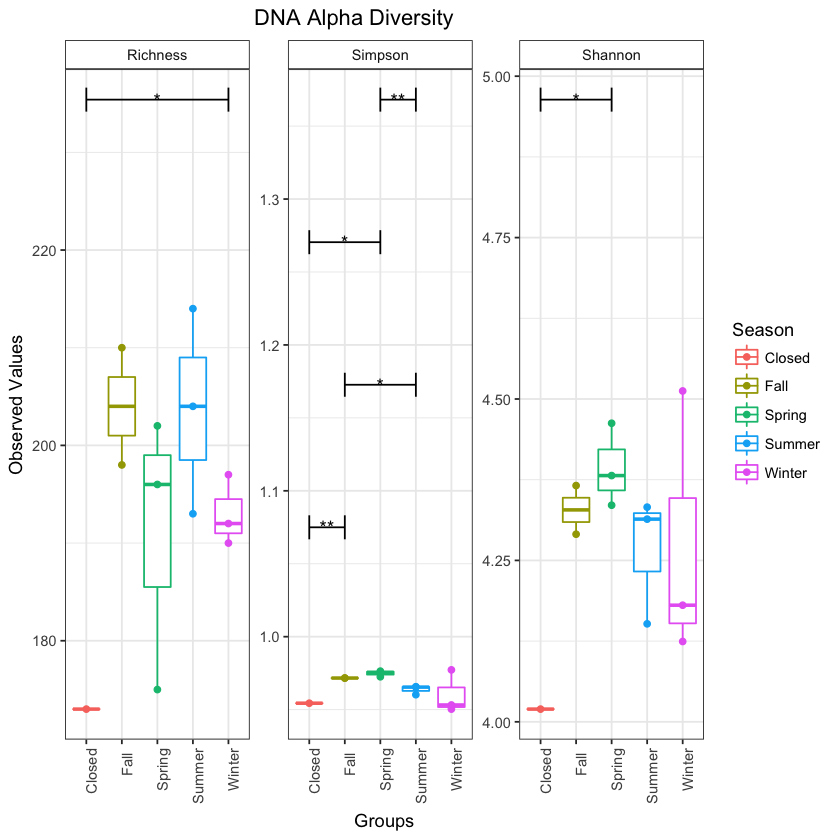

In [17]:
#pdf('PDF_Phyloseq_Seasonal_Viruses/November/DNA_RNA_Alpha_Diversity.pdf')
p<-plot_anova_diversity(viral.rarefy, method = c("richness","simpson", "shannon"),grouping_column =  "Season",pValueCutoff=0.05)+
 ggtitle("                               DNA Alpha Diversity")
print(p)
#Plot richness

# Betadiversity and PERMANOVA


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.001307 0.0004356 0.0922    999  0.977
Residuals  7 0.033068 0.0047239                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.001307 0.0004356 0.0922    999  0.966
Residuals  7 0.033068 0.0047239                     

Warning message in chol.default(cov, pivot = TRUE):
“the matrix is either rank-deficient or indefinite”

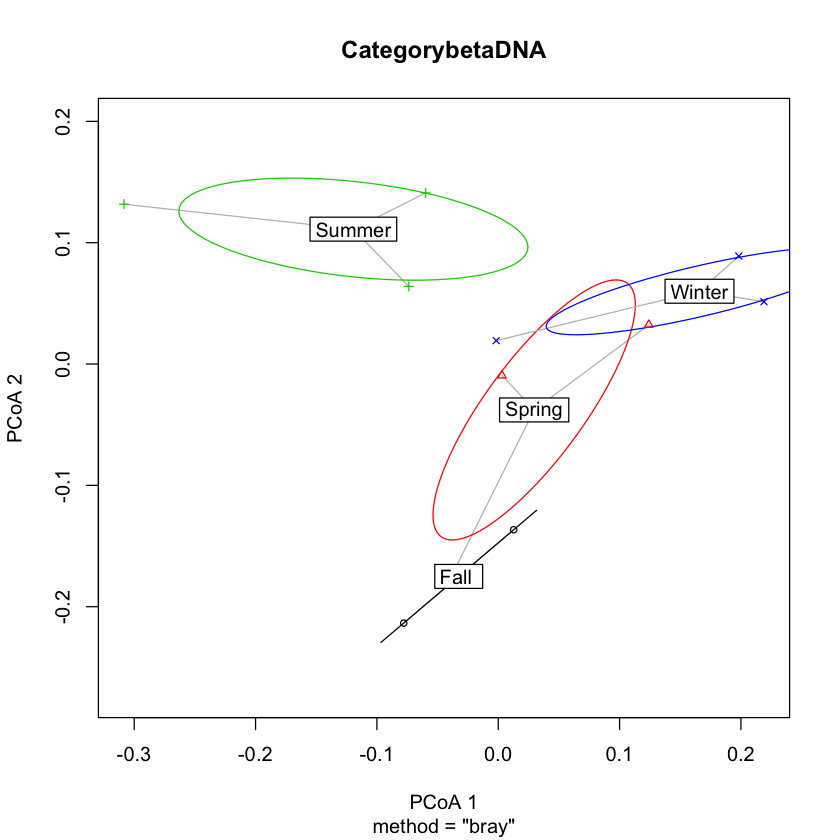

[1] "Taxa"                          "Sampling.Dates"               
[3] "Season"                        "Type_of_Nucleic_Acid"         
[5] "Type_of_Nucleic_Acid_NACLOSED" "DNA_noCLosed"                 
[7] "RNA_noCLosed"                  "Description"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Season,3,0.3417775,0.11392584,1.662694,0.4160867,0.00639936
Residuals,7,0.4796319,0.06851884,NA,0.5839133,NA
Total,10,0.8214094,NA,NA,1.0000000,NA


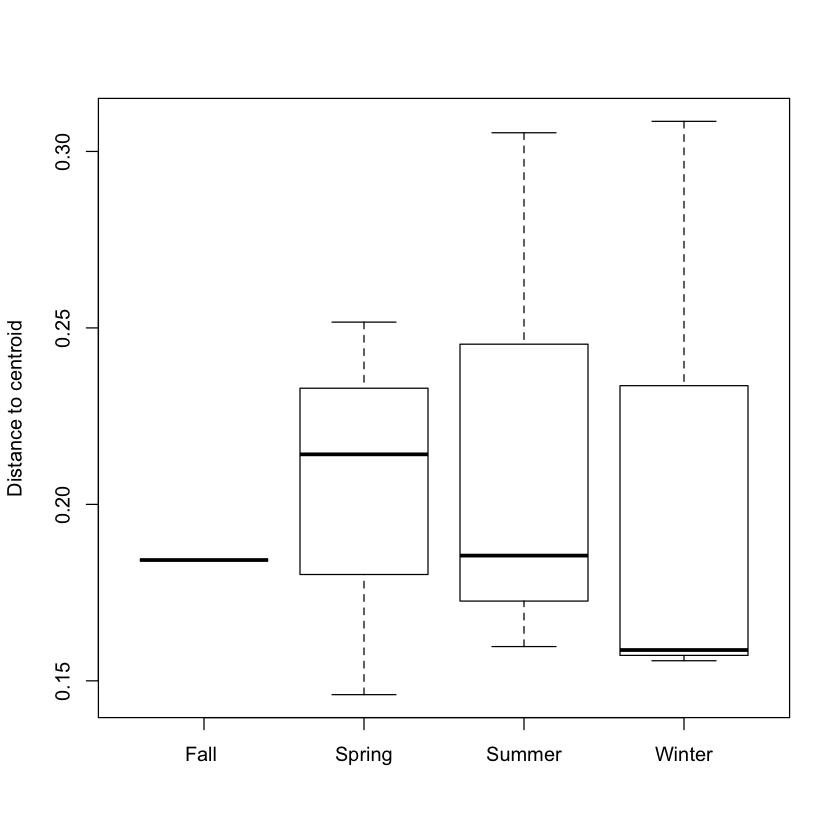

In [18]:
library('vegan')
###############################################
#####  PERMANOVA  ############-----------------
###############################################

#make a data frame from the sample_data (unweighted unifrac)
viral.rarefy=subset_samples(viral.rarefy, Season != 'Closed')
df = as(sample_data(viral.rarefy), "data.frame")
d = phyloseq::distance(viral.rarefy, "bray")

#test for homogeneity of data
sampledf <- data.frame(sample_data(viral.rarefy))
beta <- betadisper(d, sampledf$Season)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Season)
permutest(CategorybetaDNA)

plot(CategorybetaDNA, ellipse = TRUE, hull=F)
boxplot(CategorybetaDNA)

#now run permanova
set.seed(2)
GPNMDS = ordinate(viral.rarefy, "PCoA", d)
sample_variables(viral.rarefy)
a=adonis(d ~ Season, as(sample_data(viral.rarefy), "data.frame"), permutations=10000, method='jaccard', weighted=FALSE)
a$aov.tab

# Random Forest

In [19]:
# remove any taxa whose sum is 0
physeq.DNA.Close_0_Filtered <- prune_taxa(taxa_sums(viral.rarefy) > 0,viral.rarefy)
# only keep taxa with a total abudnance of atleast 10
physeq.DNA.Close_5_Filtered <- prune_taxa(taxa_sums(physeq.DNA.Close_0_Filtered) > 10, physeq.DNA.Close_0_Filtered)
physeq.DNA.Close_5_Filtered

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 165 taxa and 11 samples ]
sample_data() Sample Data:       [ 11 samples by 8 sample variables ]
tax_table()   Taxonomy Table:    [ 165 taxa by 7 taxonomic ranks ]

In [20]:
library(randomForest)
#our predictors will be our table, in this case I gave them random OTU names so that there would be no issues with
#format aka space, characters ect..
predictors <- otu_table(physeq.DNA.Close_5_Filtered)
#set sample data to new variable
physeq.DNA.Close_5_Filtered_sample_Data <- sample_data(physeq.DNA.Close_5_Filtered)
#make sure that new variable is a factor
response <- as.factor(sample_data(physeq.DNA.Close_5_Filtered_sample_Data)$Season)
#make a datafram of our reponse and predictors
rf.data <- data.frame(response,predictors)
set.seed(123)
#run random forest
physeq.DNA.Close_5_Filtered_Classify <- randomForest(response~., data = rf.data, ntree = 200)
print(physeq.DNA.Close_5_Filtered_Classify)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin




Call:
 randomForest(formula = response ~ ., data = rf.data, ntree = 200) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 12

        OOB estimate of  error rate: 72.73%
Confusion matrix:
       Fall  Spring Summer Winter class.error
Fall       0      1      0      1           1
Spring     1      0      0      2           1
Summer     0      0      3      0           0
Winter     1      1      1      0           1


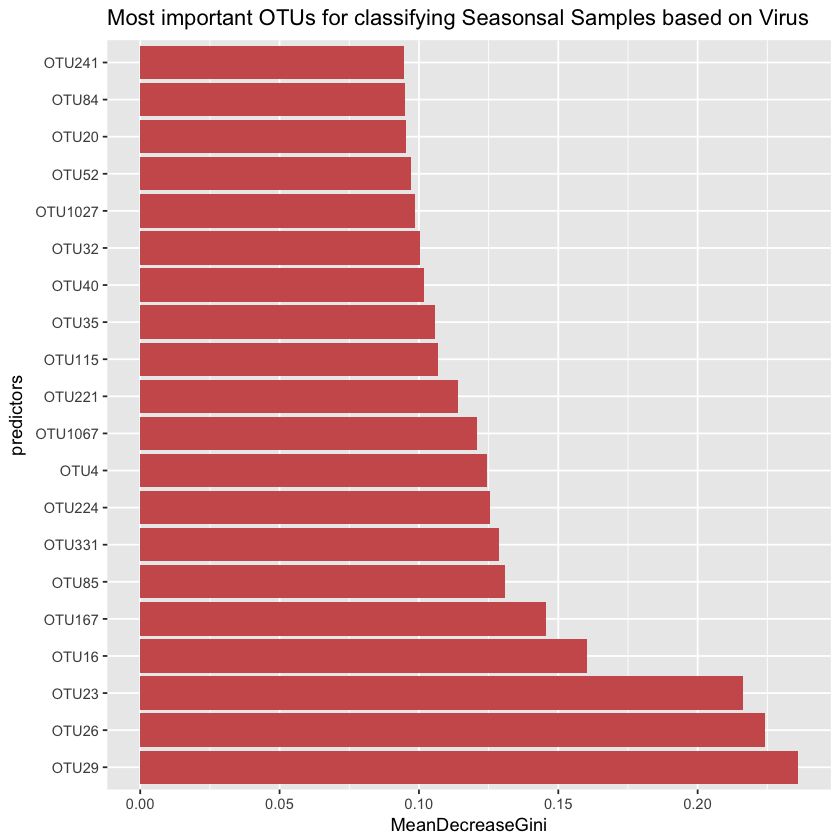

In [21]:
#GRAPH

#relative importance of all our variables
imp <- importance(physeq.DNA.Close_5_Filtered_Classify)
imp <- data.frame(predictors = rownames(imp), imp)
imp.sort <- arrange(imp, desc(imp[,2]))

imp.sort$predictors <- factor(imp.sort$predictors, levels = imp.sort$predictors)

imp.20 <- imp.sort[1:20, ]

ggplot(imp.20, aes(x = predictors, y = MeanDecreaseGini)) +
  geom_bar(stat = "identity", fill = "indianred") + 
  coord_flip() +
  ggtitle("Most important OTUs for classifying Seasonsal Samples based on Virus")

In [22]:
library(knitr)
#-----
# What are those OTUs?
otunames <- imp.20$predictors
r <- rownames(tax_table(physeq.DNA.Close_5_Filtered)) %in% otunames

kable(tax_table(physeq.DNA.Close_5_Filtered)[r, ])



|        |Domain  |Phylum                         |Class                 |Order                 |Family                            |Genus                             |Species                           |
|:-------|:-------|:------------------------------|:---------------------|:---------------------|:---------------------------------|:---------------------------------|:---------------------------------|
|OTU4    |Viruses |dsDNA viruses no RNA stage     |Caudovirales          |Siphoviridae          |Spbetavirus                       |unclassified Spbetalikevirus      |Staphylococcus phage SPbeta-like  |
|OTU16   |Viruses |dsDNA viruses no RNA stage     |Caudovirales          |Siphoviridae          |Lactococcus phage P335 sensu lato |Lactococcus phage P335 sensu lato |Lactococcus phage P335 sensu lato |
|OTU20   |Viruses |dsDNA viruses no RNA stage     |Caudovirales          |Siphoviridae          |C2virus                           |Lactococcus virus bIL67           |Lactococcus virus b

In [23]:
DNArf <- subset_taxa(physeq.DNA.Close_5_Filtered, rownames(tax_table(physeq.DNA.Close_5_Filtered)) %in% c('OTU172','OTU336', 'OTU65', 'OTU20', 'OTU94', 'OTU83', 'OTU19', 'OTU201', 'OTU11' ,'OTU34' ,'OTU850' ,'OTU159' ,'OTU13' ,'OTU115','OTU16' ,'OTU108' ,'OTU106','OTU826', 'OTU22', 'OTU4'))
otunames

[1] OTU29   OTU26   OTU23   OTU16   OTU167  OTU85   OTU331  OTU224  OTU4   
[10] OTU1067 OTU221  OTU115  OTU35   OTU40   OTU32   OTU1027 OTU52   OTU20  
[19] OTU84   OTU241 
165 Levels: OTU29 OTU26 OTU23 OTU16 OTU167 OTU85 OTU331 OTU224 OTU4 ... OTU1026

Warning message:
“Transformation introduced infinite values in discrete y-axis”

Warning message:
“Transformation introduced infinite values in discrete y-axis”

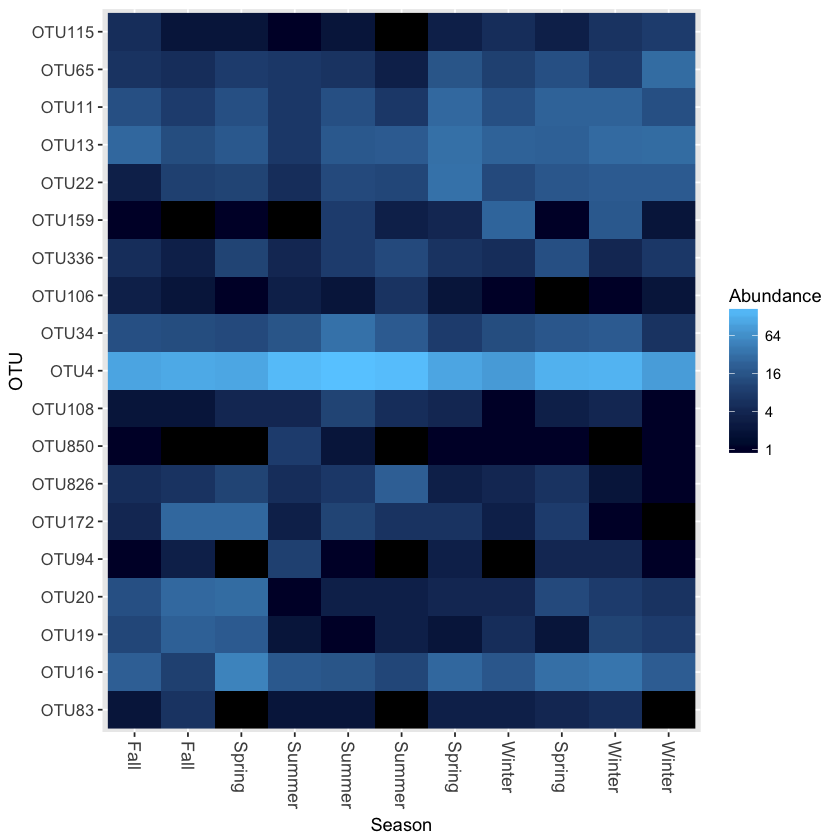

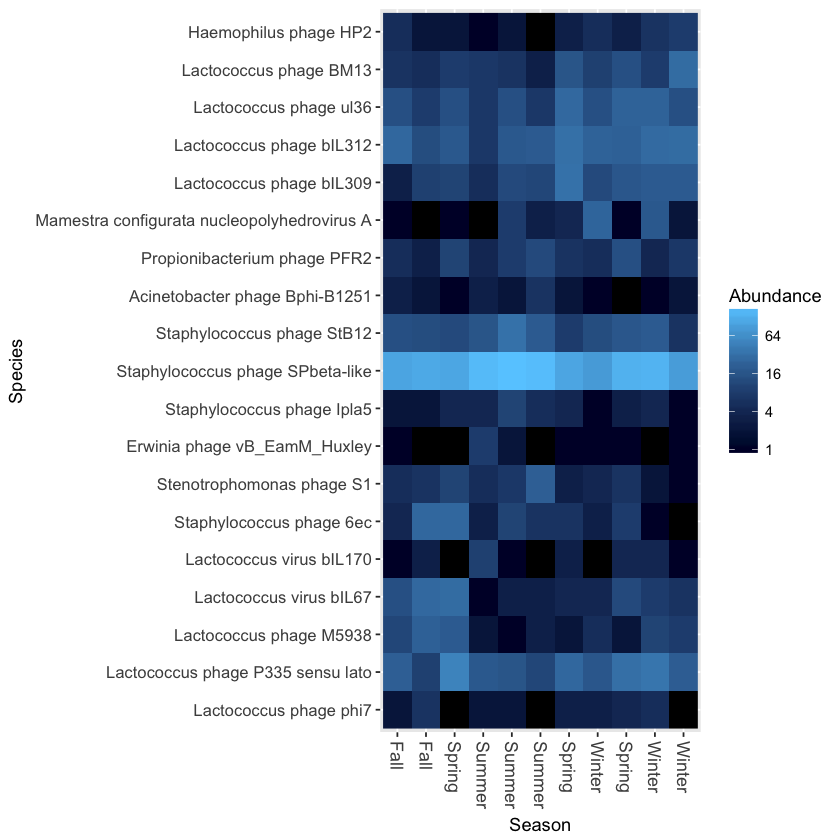

In [24]:
plot_heatmap(DNArf, sample.label="Season")
plot_heatmap(DNArf, "NMDS", "bray", "Season", "Species")

# Kruskall Wallis

,X1,X2,X3,X4,X5
AP-DNA-1-Jan-Winter,AP,DNA,1,Jan,Winter
AP-DNA-10-Sep-Fall,AP,DNA,10,Sep,Fall
AP-DNA-11-Oct-Fall,AP,DNA,11,Oct,Fall
AP-DNA-12-Nov-Winter,AP,DNA,12,Nov,Winter
AP-DNA-2-Feb-Winter,AP,DNA,2,Feb,Winter
AP-DNA-3-Mar-Spring,AP,DNA,3,Mar,Spring


c..AP....DNA....1....Jan....Winter..   c..AP....DNA....10....Sep....Fall.. 
                               Winter                                  Fall 
  c..AP....DNA....11....Oct....Fall.. c..AP....DNA....12....Nov....Winter.. 
                                 Fall                                Winter 
 c..AP....DNA....2....Feb....Winter..  c..AP....DNA....3....Mar....Spring.. 
                               Winter                                Spring 
 c..AP....DNA....4....Apr....Spring..  c..AP....DNA....5....May....Spring.. 
                               Spring                                Spring 
 c..AP....DNA....6....Jun....Summer.. c..AP....DNA....7....July....Summer.. 
                               Summer                                Summer 
 c..AP....DNA....8....Aug....Summer.. 
                               Summer 
Levels: Fall Spring Summer Winter

Kruskal-Wallis test for OTU4 1/19; p-value=0.0945673593556057
Kruskal-Wallis test for OTU11 2/19; p-value=0.11030705766114
Kruskal-Wallis test for OTU13 3/19; p-value=0.210464764202246
Kruskal-Wallis test for OTU16 4/19; p-value=0.120799041323136
Kruskal-Wallis test for OTU19 5/19; p-value=0.118407517729906
Kruskal-Wallis test for OTU20 6/19; p-value=0.05543653927643
Kruskal-Wallis test for OTU22 7/19; p-value=0.109691979331218
Kruskal-Wallis test for OTU34 8/19; p-value=0.272141289464313
Kruskal-Wallis test for OTU65 9/19; p-value=0.0553419159756885
Kruskal-Wallis test for OTU83 10/19; p-value=0.577669468877766
Kruskal-Wallis test for OTU94 11/19; p-value=0.989968384588369
Kruskal-Wallis test for OTU106 12/19; p-value=0.101045178702868
Kruskal-Wallis test for OTU108 13/19; p-value=0.0833163055112018
Kruskal-Wallis test for OTU115 14/19; p-value=0.0474329923538359
Kruskal-Wallis test for OTU159 15/19; p-value=0.202811800397081
Kruskal-Wallis test for OTU172 16/19; p-value=0.10391666866

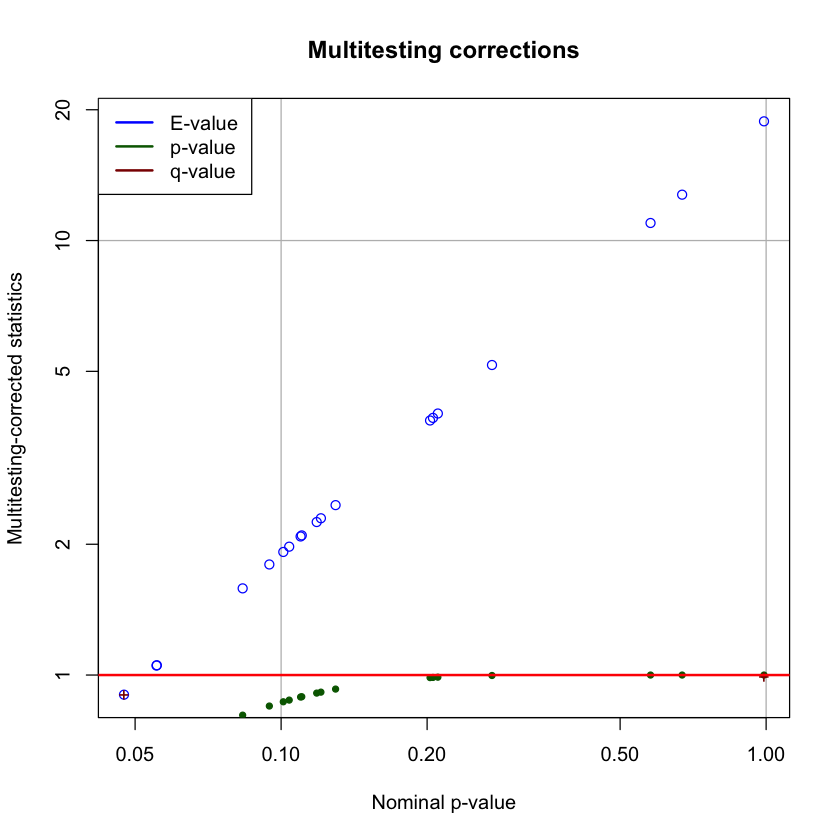

In [25]:
data=as.data.frame(otu_table(DNArf))# changed this
grouping_info<-data.frame(row.names=rownames(data),t(as.data.frame(strsplit(rownames(data),"-"))))

head(grouping_info)
groups=as.factor(grouping_info[,5])
groups


kruskal.wallis.alpha=1
kruskal.wallis.table <- data.frame()
for (i in 1:dim(data)[2]) {
  ks.test <- kruskal.test(data[,i], g=groups)
  # Store the result in the data frame
  kruskal.wallis.table <- rbind(kruskal.wallis.table,
                                data.frame(id=names(data)[i],
                                           p.value=ks.test$p.value
                                ))
  # Report number of values tested
  cat(paste("Kruskal-Wallis test for ",names(data)[i]," ", i, "/", 
            dim(data)[2], "; p-value=", ks.test$p.value,"\n", sep=""))
}
 

kruskal.wallis.table$E.value <- kruskal.wallis.table$p.value * dim(kruskal.wallis.table)[1]
 
kruskal.wallis.table$FWER <- pbinom(q=0, p=kruskal.wallis.table$p.value, 
                                    size=dim(kruskal.wallis.table)[1], lower.tail=FALSE)
 
kruskal.wallis.table <- kruskal.wallis.table[order(kruskal.wallis.table$p.value,
                                                   decreasing=FALSE), ]
kruskal.wallis.table$q.value.factor <- dim(kruskal.wallis.table)[1] / 1:dim(kruskal.wallis.table)[1]
kruskal.wallis.table$q.value <- kruskal.wallis.table$p.value * kruskal.wallis.table$q.value.factor
#pdf("KW_correction.pdf")
plot(kruskal.wallis.table$p.value,
     kruskal.wallis.table$E.value,
     main='Multitesting corrections',
     xlab='Nominal p-value',
     ylab='Multitesting-corrected statistics',
     log='xy',
     col='blue',
     panel.first=grid(col='#BBBBBB',lty='solid'))
lines(kruskal.wallis.table$p.value,
      kruskal.wallis.table$FWER,
      pch=20,col='darkgreen', type='p'
)
lines(kruskal.wallis.table$p.value,
      kruskal.wallis.table$q.value,
      pch='+',col='darkred', type='p'
)
abline(h=kruskal.wallis.alpha, col='red', lwd=2)
legend('topleft', legend=c('E-value', 'p-value', 'q-value'), col=c('blue', 'darkgreen','darkred'), lwd=2,bg='white',bty='o')
#dev.off()
 
last.significant.element <- max(which(kruskal.wallis.table$q.value <= kruskal.wallis.alpha))
selected <- 1:last.significant.element
diff.cat.factor <- kruskal.wallis.table$id[selected]
diff.cat <- as.vector(diff.cat.factor)
 
print(kruskal.wallis.table[selected,])
 



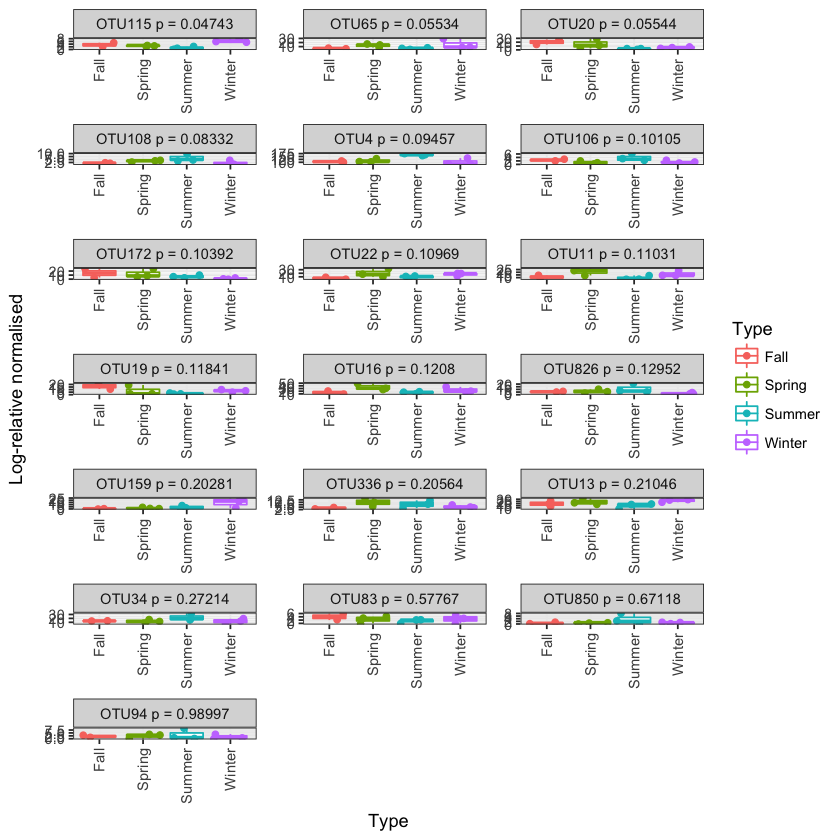

In [26]:

# to use q value instead of p value
#df<-NULL
#for(i in diff.cat){
 # tmp<-data.frame(data[,i],groups,rep(paste(i," q = ",round(kruskal.wallis.table[kruskal.wallis.table$id==i,"q.value"],5),sep=""),dim(data)[1]))
  #if(is.null(df)){df<-tmp} else { df<-rbind(df,tmp)} 
#}
#Now we plot taxa significantly different between the categories
df<-NULL
for(i in diff.cat){
  tmp<-data.frame(data[,i],groups,rep(paste(i," p = ",round(kruskal.wallis.table[kruskal.wallis.table$id==i,"p.value"],5),sep=""),dim(data)[1]))
  if(is.null(df)){df<-tmp} else { df<-rbind(df,tmp)} 
}
colnames(df)<-c("Value","Type","Taxa")
 
p<-ggplot(df,aes(Type,Value,colour=Type))+ylab("Log-relative normalised")
p<-p+geom_boxplot()+geom_jitter()+theme_bw()+
  facet_wrap( ~ Taxa , scales="free", ncol=3)
p<-p+theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))
#pdf("bbpracticeKW_significant.pdf",width=10,height=14)
print(p)
#dev.off()